In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 

In [2]:
dataset = pd.read_csv("D:\Data Science\materials\ML\Sourabh\AirBNB.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pavan\AppData\Local\Temp\ipykernel_5236\94668694.py:1: SyntaxWarning: invalid escape sequence '\D'
  dataset = pd.read_csv("D:\Data Science\materials\ML\Sourabh\AirBNB.csv")
C:\Users\pavan\AppData\Local\Temp\ipykernel_5236\94668694.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("D:\Data Science\materials\ML\Sourabh\AirBNB.csv")


In [22]:
df = dataset.copy()
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [39]:
df.shape

(74111, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [26]:
df.drop('id', axis='columns', inplace=True)

In [28]:
df.describe().T.style.background_gradient(cmap='Blues', axis=1)

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.000000,3.155125,2.153603,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,73908.000000,1.235272,0.582054,0.000000,1.000000,1.000000,1.000000,8.000000
review_scores_rating,57389.000000,94.067365,7.836556,20.000000,92.000000,96.000000,100.000000,100.000000
bedrooms,74019.000000,1.265797,0.852149,0.000000,1.000000,1.000000,1.000000,10.000000
beds,73980.000000,1.710868,1.254142,0.000000,1.000000,1.000000,2.000000,18.000000
log_price,74111.000000,4.782069,0.717394,0.000000,4.317488,4.709530,5.220356,7.600402


In [32]:
df.isnull().sum()   # checking the null values

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [34]:
df.nunique()    # checking the unique values

room_type                 3
accommodates             16
bathrooms                17
cancellation_policy       3
cleaning_fee              2
instant_bookable          2
review_scores_rating     54
bedrooms                 11
beds                     18
log_price               767
dtype: int64

In [36]:
len(df[df.duplicated()]) # checking duplicates

19994

In [45]:
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = [ feature for feature in df.columns if df[feature].dtype != 'O']

print("The numerical features are :", numerical_features)
print("The categorical features are :", categorical_features)

The numerical features are : ['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds', 'log_price']
The categorical features are : ['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']


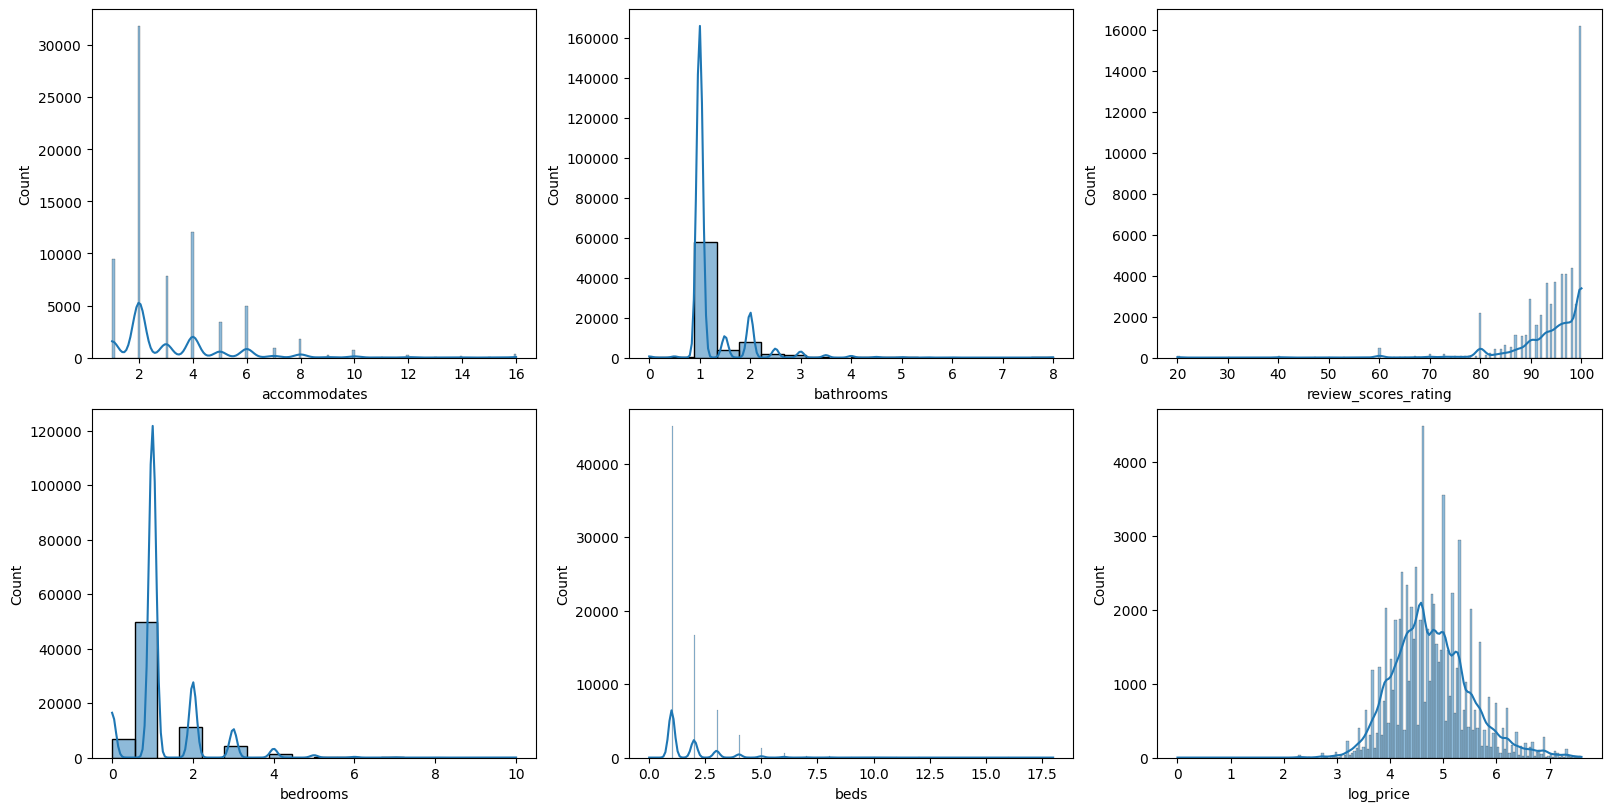

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8), constrained_layout=True)

ax = ax.flatten()
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df[feature], ax=ax[i], kde=True)

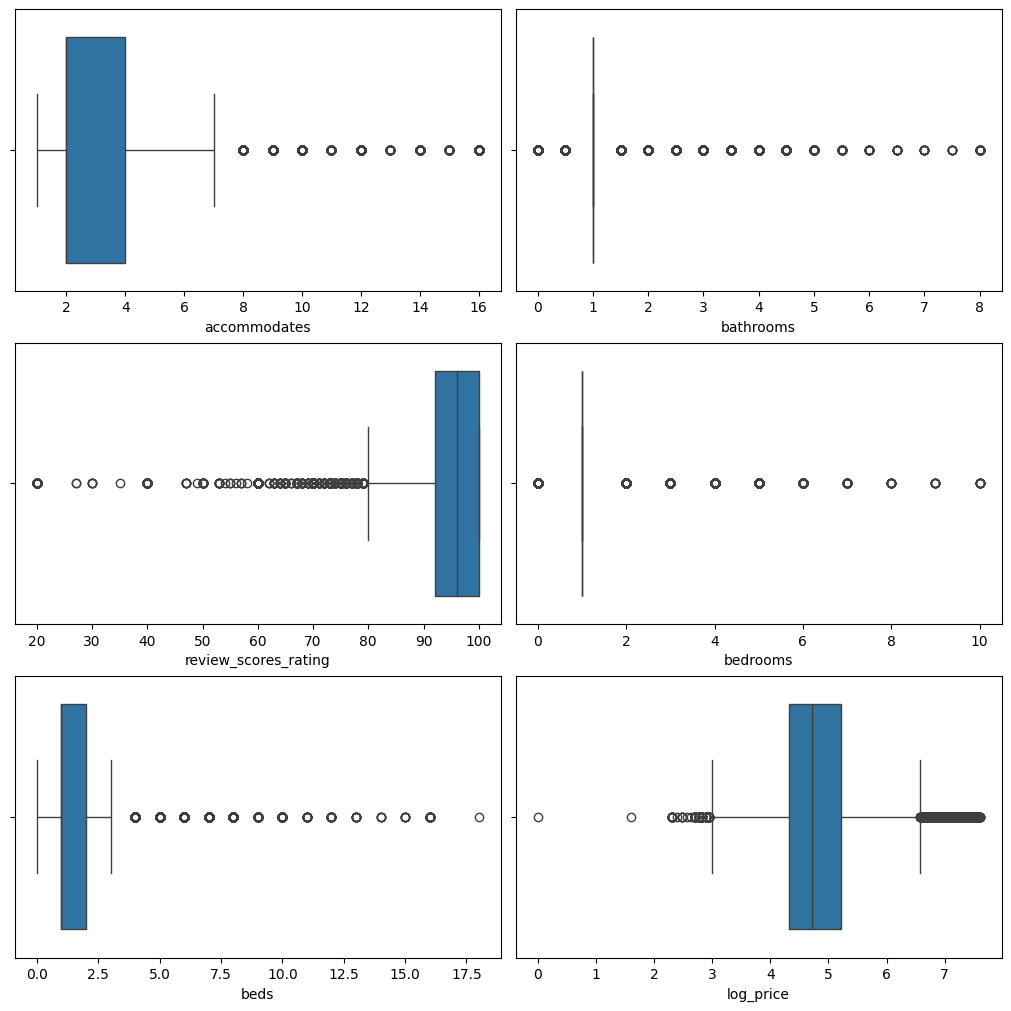

In [53]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10), constrained_layout=True)

ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=ax[i])

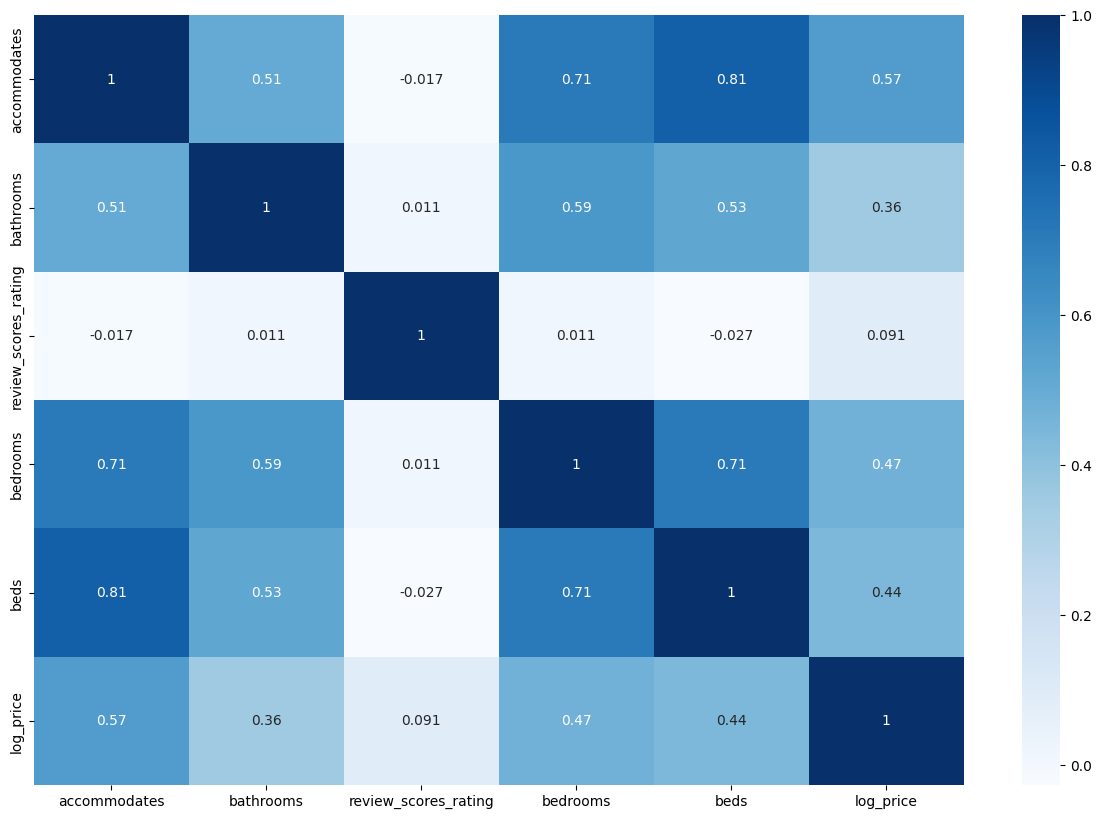

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df[numerical_features].corr(),annot=True, cmap='Blues')
plt.show()

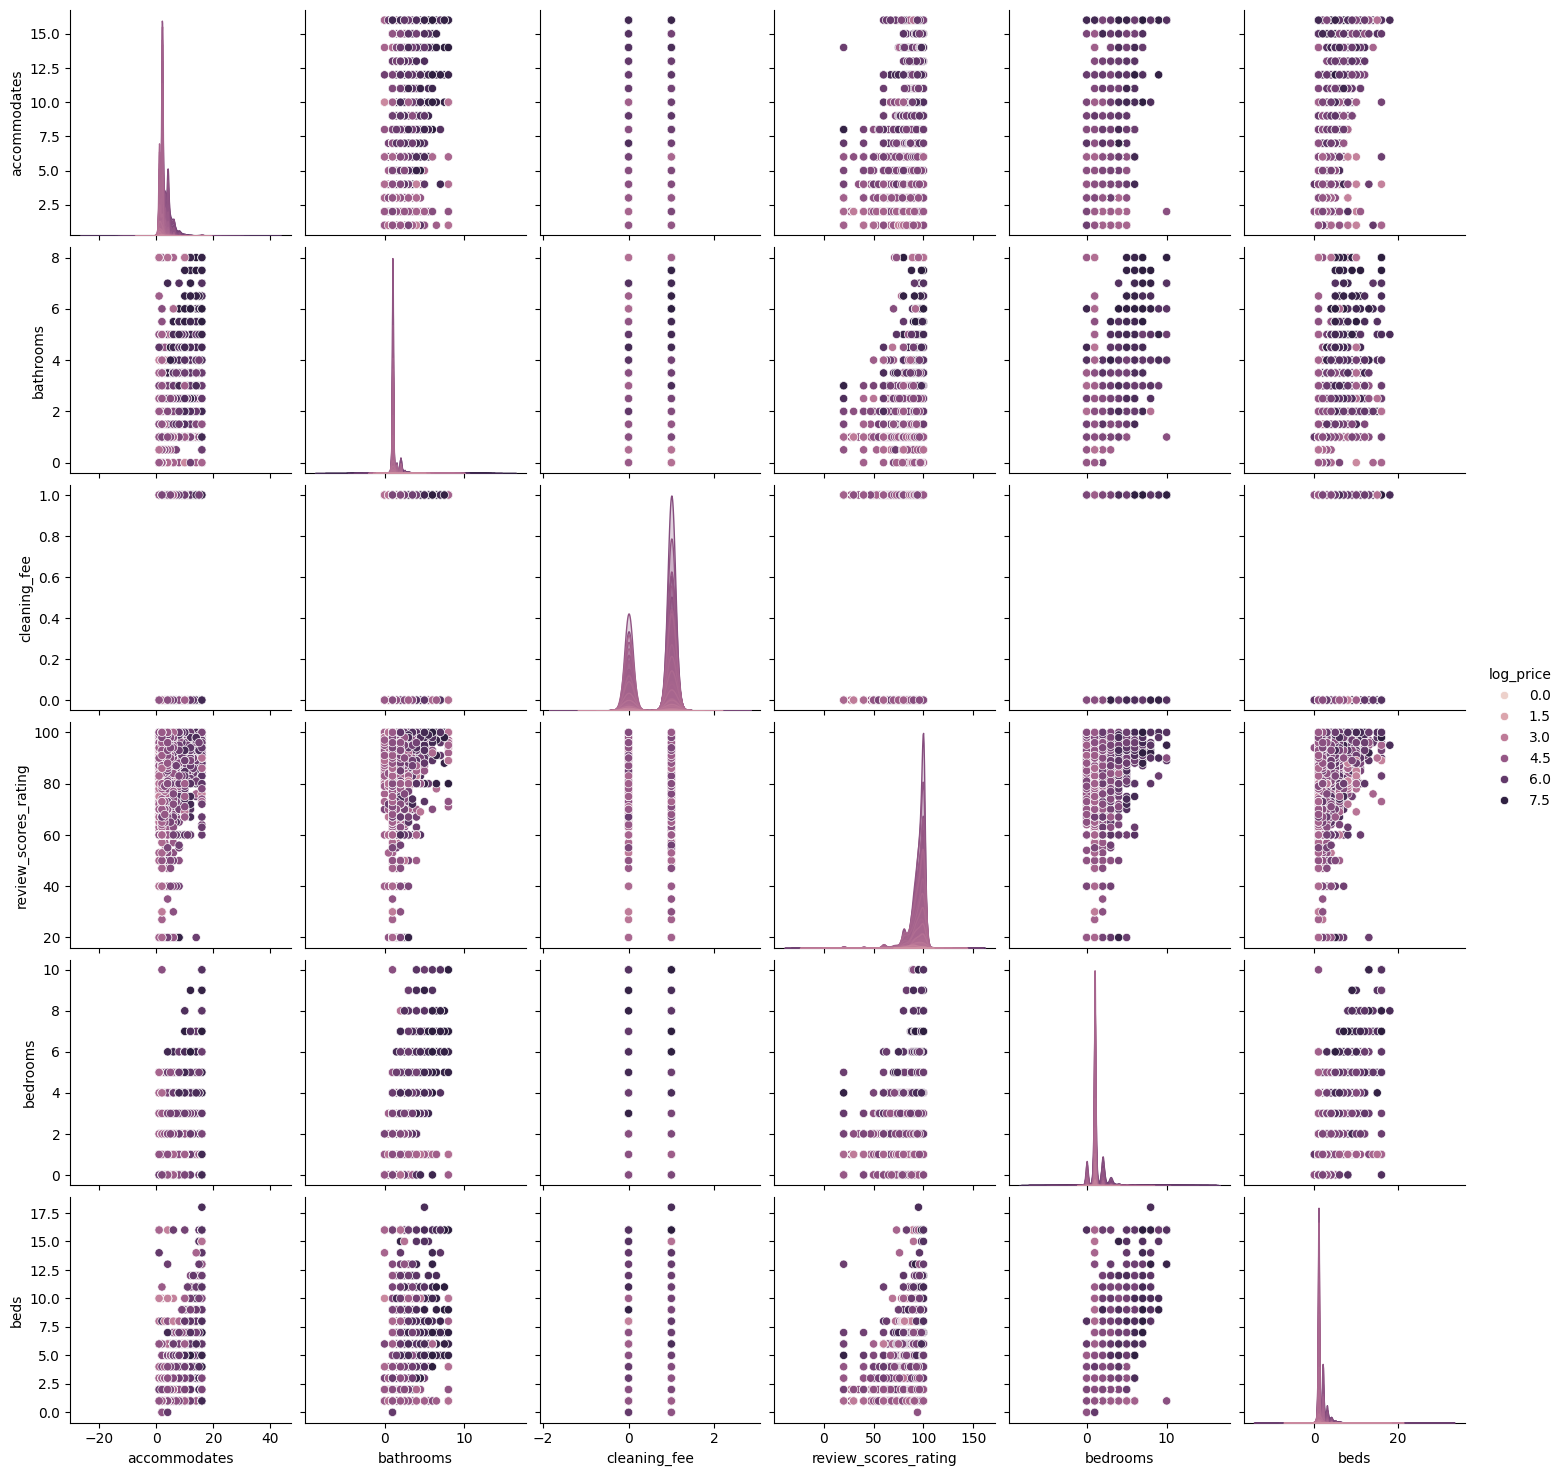

In [60]:
sns.pairplot(df, hue='log_price')

In [61]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [62]:
for feature in categorical_features:
    print(df[feature].value_counts(normalize=True))

room_type
Entire home/apt    0.557418
Private room       0.413394
Shared room        0.029188
Name: proportion, dtype: float64
cancellation_policy
strict      0.438579
flexible    0.304212
moderate    0.257210
Name: proportion, dtype: float64
cleaning_fee
True     0.73406
False    0.26594
Name: proportion, dtype: float64
instant_bookable
f    0.737542
t    0.262458
Name: proportion, dtype: float64


In [68]:
# converting the categorical features into numerical features
df['room_type'].replace({'Entire home/apt': 0, 'Private room': 1, 'Shared room' : 2}, inplace=True)
df['cancellation_policy'].replace({'strict' : 0, 'flexible' : 1, 'moderate' : 2}, inplace=True)
df['cleaning_fee'].replace({True : 1, False : 0}, inplace=True)
df['instant_bookable'].replace({'f' : 0, 't' : 1}, inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_5236\2363582866.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cleaning_fee'].replace({True : 1, False : 0}, inplace=True)


In [69]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0.0,3.0,1.0,0.0,1.0,0,100.0,1.0,1.0,5.010635
1,0.0,7.0,1.0,0.0,1.0,1,93.0,3.0,3.0,5.129899
2,0.0,5.0,1.0,2.0,1.0,1,92.0,1.0,3.0,4.976734
3,0.0,4.0,1.0,1.0,1.0,0,NaN,2.0,2.0,6.620073
4,0.0,2.0,1.0,2.0,1.0,1,40.0,0.0,1.0,4.744932


In [71]:
df.corr().style.background_gradient(cmap='Blues')

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
room_type,1.000000,-0.458155,-0.115975,0.085625,-0.213326,0.027710,-0.044642,-0.243423,-0.317365,-0.607144
accommodates,-0.458155,1.000000,0.505645,-0.141456,0.182311,0.053100,-0.017093,0.709275,0.810798,0.567580
bathrooms,-0.115975,0.505645,1.000000,-0.088469,0.053797,0.001451,0.010527,0.589935,0.525598,0.355425
cancellation_policy,0.085625,-0.141456,-0.088469,1.000000,-0.103315,-0.022812,0.060394,-0.105212,-0.131957,-0.107933
cleaning_fee,-0.213326,0.182311,0.053797,-0.103315,1.000000,0.010014,0.034865,0.105468,0.131653,0.111179
instant_bookable,0.027710,0.053100,0.001451,-0.022812,0.010014,1.000000,-0.068874,-0.003647,0.051354,-0.044271
review_scores_rating,-0.044642,-0.017093,0.010527,0.060394,0.034865,-0.068874,1.000000,0.011134,-0.027330,0.091219
bedrooms,-0.243423,0.709275,0.589935,-0.105212,0.105468,-0.003647,0.011134,1.000000,0.709415,0.473214
beds,-0.317365,0.810798,0.525598,-0.131957,0.131653,0.051354,-0.027330,0.709415,1.000000,0.442153
log_price,-0.607144,0.567580,0.355425,-0.107933,0.111179,-0.044271,0.091219,0.473214,0.442153,1.000000
